## 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!


### (1) 데이터 가져오기
- sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.
- diabetes의 data를 df_X에, target을 df_y에 저장해주세요.


In [1]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

In [2]:
df_X = diabetes.data
df_y = diabetes.target

### (2) 모델에 입력할 데이터 X 준비하기
- df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [3]:
import numpy as np

df_X = np.array(df_X)
df_X.shape

(442, 10)

### (3) 모델에 예측할 데이터 y 준비하기
- df_y에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [4]:
df_y = np.array(df_y)

### (4) train 데이터와 test 데이터로 분리하기
- X와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=123)

print(f"전체 학습 데이터: {df_X.shape} 레이블: {df_y.shape}")
print(f"학습 데이터: {X_train.shape} 레이블: {y_train.shape}")
print(f"테스트 데이터: {X_test.shape} 레이블: {y_test.shape}")

전체 학습 데이터: (442, 10) 레이블: (442,)
학습 데이터: (353, 10) 레이블: (353,)
테스트 데이터: (89, 10) 레이블: (89,)


### (5) 모델 준비하기
- 입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.
- 모델 함수를 구현해주세요.

In [6]:
W = np.ones(shape=(10,))
b = 0

### (6) 손실함수 loss 정의하기
- 손실함수를 MSE 함수로 정의해주세요.

In [7]:
def loss(y, y_pred):
    return ((y_pred - y) ** 2).mean()

### (7) 기울기를 구하는 gradient 함수 구현하기
- 기울기를 계산하는 gradient 함수를 구현해주세요.

In [8]:
def gradient(x, y, y_pred):
    error = y_pred - y
    w_grad = 2 * np.dot(x.T, error) / len(y)
    b_grad = 2 * error.mean()
    return w_grad, b_grad

### (8) 하이퍼 파라미터인 학습률 설정하기
- 학습률, learning rate 를 설정해주세요
- 만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.


In [38]:
learning_rate = 0.8

### (9) 모델 학습하기
- 정의된 손실함수와 기울기 함수로 모델을 학습해주세요.
- loss값이 충분히 떨어질 때까지 학습을 진행해주세요.
- 입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.


In [45]:
epochs = 10000

In [46]:
losses = []
weight_history = []
bias_history = []

In [47]:
for epoch in range(epochs):
    
    # 예측값 계산
    y_pred = np.dot(X_train, W) + b
    # 손실 계산
    l = loss(y_train, y_pred)
    # 기울기 계산
    w_grad, b_grad = gradient(X_train, y_train, y_pred)
    
    # 가중치와 편향 업데이트
    W -= learning_rate * w_grad
    b -= learning_rate * b_grad

    print(f'epoch {epoch + 1}, loss: {l}')

    # 손실 및 가중치 저장
    losses.append(l)
    weight_history.append(W.copy())
    bias_history.append(b)

epoch 1, loss: 2930.265319786892
epoch 2, loss: 2930.2638808322845
epoch 3, loss: 2930.2624420196244
epoch 4, loss: 2930.261003348732
epoch 5, loss: 2930.259564819433
epoch 6, loss: 2930.2581264315486
epoch 7, loss: 2930.2566881849048
epoch 8, loss: 2930.2552500793263
epoch 9, loss: 2930.2538121146395
epoch 10, loss: 2930.25237429067
epoch 11, loss: 2930.250936607246
epoch 12, loss: 2930.249499064194
epoch 13, loss: 2930.248061661344
epoch 14, loss: 2930.246624398524
epoch 15, loss: 2930.2451872755646
epoch 16, loss: 2930.2437502922958
epoch 17, loss: 2930.2423134485502
epoch 18, loss: 2930.2408767441584
epoch 19, loss: 2930.2394401789516
epoch 20, loss: 2930.2380037527664
epoch 21, loss: 2930.236567465434
epoch 22, loss: 2930.235131316789
epoch 23, loss: 2930.233695306668
epoch 24, loss: 2930.232259434905
epoch 25, loss: 2930.2308237013376
epoch 26, loss: 2930.2293881058026
epoch 27, loss: 2930.227952648137
epoch 28, loss: 2930.2265173281794
epoch 29, loss: 2930.225082145769
epoch 30,

### (10) test 데이터에 대한 성능 확인하기
- test 데이터에 대한 성능을 확인해주세요.


In [48]:
y_pred = np.dot(X_test, W) + b

In [49]:
loss(y_test, y_pred)

2729.708864632112

### (11) 정답 데이터와 예측한 데이터 시각화하기
- x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.

In [50]:
import matplotlib.pyplot as plt

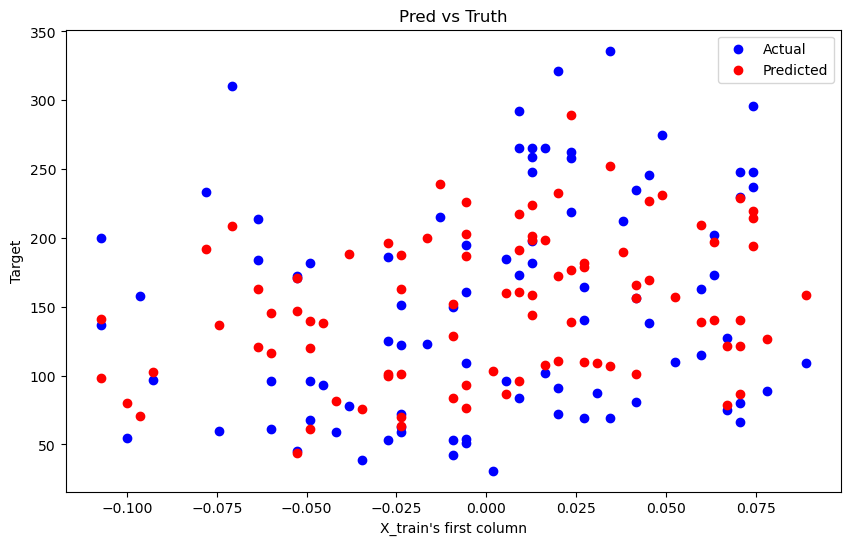

In [52]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], y_test, color='blue', label='Actual')
plt.scatter(X_test[:, 0], y_pred, color='red', label='Predicted')

plt.xlabel('X_train\'s first column')
plt.ylabel('Target')
plt.title('Pred vs Truth')

plt.legend()
plt.show()